In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
game_logs_data = pd.read_csv('2000-2021 Season Game Logs with Advanced Stats.csv',index_col=0,dtype={'GAME_ID':'str'})

C:\Users\Arthur\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (69) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
game_logs_data.head()

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE
0,2000-01,2053,Dalibor Bagaric,Dalibor,1610612741,CHI,Chicago Bulls,0020001181,2001-04-18T00:00:00,CHI @ PHI,...,0.0,0.500,0.521,0.158,0.161,94.29,96.51,80.43,19,0.113
1,2000-01,397,Reggie Miller,Reggie,1610612754,IND,Indiana Pacers,0020001184,2001-04-18T00:00:00,IND @ CLE,...,0.0,0.559,0.600,0.295,0.294,100.17,99.41,82.84,58,0.137
2,2000-01,469,Jamal Mashburn,Jamal,1610612766,CHH,Charlotte Hornets,0020001179,2001-04-18T00:00:00,CHH @ BOS,...,12.1,0.357,0.436,0.326,0.329,93.51,91.37,76.14,69,0.118
3,2000-01,1088,Chucky Atkins,Chucky,1610612765,DET,Detroit Pistons,0020001180,2001-04-18T00:00:00,DET @ NYK,...,0.0,0.222,0.253,0.164,0.163,100.13,99.19,82.66,57,0.048
4,2000-01,1890,Shawn Marion,Shawn,1610612756,PHX,Phoenix Suns,0020001187,2001-04-18T00:00:00,PHX vs. UTA,...,0.0,0.600,0.680,0.130,0.136,86.04,83.34,69.45,40,0.179


In [9]:
game_logs_data.columns

Index(['SEASON_YEAR', 'PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'TEAM_ID',
       'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP',
       'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM',
       'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK',
       'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'NBA_FANTASY_PTS', 'DD2',
       'TD3', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK',
       'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK',
       'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK',
       'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK',
       'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK',
       'NBA_FANTASY_PTS_RANK', 'DD2_RANK', 'TD3_RANK', 'VIDEO_AVAILABLE_FLAG',
       'TEAM_CITY', 'START_POSITION', 'COMMENT', 'E_OFF_RATING', 'OFF_RATING',
       'E_DEF_RATING', 'DEF_RATING', 'E_NET_RATING', 'NET_RATING', 'AST_PCT',
       'AST_TOV

In [10]:
game_logs_data['AST_RATIO'].describe()

count    518118.000000
mean         15.278027
std          15.574623
min           0.000000
25%           0.000000
50%          12.500000
75%          23.800000
max         100.000000
Name: AST_RATIO, dtype: float64

In [11]:
print("Number of Seasons:", len(game_logs_data['SEASON_YEAR'].unique()))
print("Number of Unique Games:", len(game_logs_data['GAME_ID'].unique()))
print("Number of Unique Teams:", len(game_logs_data['TEAM_ID'].unique()))
print("Number of Unique Players:", len(game_logs_data['PLAYER_ID'].unique()))

Number of Seasons: 21
Number of Unique Games: 25103
Number of Unique Teams: 30
Number of Unique Players: 2065


Stat Glossary:

BLKA - Blocks Against

PFD - Personal Fouls Drawn

NBA_FANTASY_PTS - https://fantasydata.com/api/fantasy-scoring-system/nba

DD2 - Double-doubles - 10 of a stat is a somewhat arbitrary number, not super meaningful and most information should be captured by counting stats anyway. Not using for clustering. 

TD3 - Triple-doubles - same as above.

Not sure how RANK columns work, but not useful for clustering. 

OFF_RATING / DEF_RATING / NET_RATING - https://www.basketball-reference.com/about/ratings.html As net rating is simply a linear combination of off rating and def rating, we will not be including this in the final model. Using only off rating and def rating also intuitively should allow us to cluster players more specifically based on their strengths.
(What is E_OFF_RATING and E_DEF_RATING?)

AST_PCT - Assist Percentage (available since the 1964-65 season in the NBA); the formula is 100 * AST / (((MP / (Tm MP / 5)) * Tm FG) - FG). Assist percentage is an estimate of the percentage of teammate field goals a player assisted while he was on the floor.https://www.basketball-reference.com/about/glossary.html

AST_TOV - AST/TOV

AST_RATIO - The Hollinger Assist Ratio (HAR) attempts to calculate the percentage of a player’s offensive possessions that result in an assist https://www.nba.com/resources/static/team/v2/thunder/statlab-activity-EN-181101.pdf
https://www.basketball-reference.com/about/glossary.html

OREB_PCT/ DREB_PCT/ REB_PCT - Offensive/Defensive/Total Rebound Percentage - Ratio of player's rebounds per minute vs. off/def/total rebounds per min https://www.basketball-reference.com/about/glossary.html

TM_TOV_PCT - Team statistic? Not useful

EFG_PCT - Effective field goal percentage https://en.wikipedia.org/wiki/Effective_field_goal_percentage

TS_PCT - True shooting percentage https://www.basketball-reference.com/about/glossary.html#:~:text=True%20shooting%20percentage%20is%20a,is%20FGA%20%2B%200.44%20*%20FTA.

Note that TS_PCT can be rewritten as (2-pointers made + 1.5* 3-pointers made + .5*free throws made)/(2-point attempts + 3-point attempts + .44*free throw attempts). The .44 roughly accounts for non-possession ending free throws (technicals, and-ones, etc.) i.e. if a player misses these, they should not be penalized for it i.e. x2 the total free throw attempts in the denominator do not include non-possession ending free throws.

USG_PCT - https://www.nbastuffer.com/analytics101/usage-rate/
E_USG_PCT?


PACE - Pace, not relevant for clustering
POSS - Poss
PIE - Player Impact Estimate https://www.nbastuffer.com/analytics101/player-impact-estimate-pie/

### Let's look specifically at the 2020-2021 season as that's what our clustering will be based on.

In [12]:
season_filter = game_logs_data['SEASON_YEAR'] == '2020-21'

game_logs_data[season_filter].head()

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE
495064,2020-21,1627827,Dorian Finney-Smith,Dorian,1610612742,DAL,Dallas Mavericks,0022001071,2021-05-16T00:00:00,DAL @ MIN,...,23.1,0.833,0.833,0.179,0.183,104.02,101.75,84.79,60,0.076
495065,2020-21,201144,Mike Conley,Mike,1610612762,UTA,Utah Jazz,0022001077,2021-05-16T00:00:00,UTA @ SAC,...,5.0,0.550,0.550,0.204,0.207,106.71,105.53,87.94,47,0.202
495066,2020-21,204456,T.J. McConnell,T.J.,1610612754,IND,Indiana Pacers,0022001079,2021-05-16T00:00:00,IND @ TOR,...,6.9,0.600,0.600,0.124,0.126,105.32,105.97,88.31,88,0.155
495067,2020-21,1628964,Mo Bamba,Mo,1610612753,ORL,Orlando Magic,0022001075,2021-05-16T00:00:00,ORL @ PHI,...,6.3,0.400,0.414,0.235,0.233,101.74,99.52,82.93,46,0.047
495068,2020-21,1629658,Jaylen Hoard,Jaylen,1610612760,OKC,Oklahoma City Thunder,0022001074,2021-05-16T00:00:00,OKC vs. LAC,...,18.2,0.400,0.425,0.110,0.110,99.64,96.44,80.36,59,0.037


In [13]:
player_start_positions = game_logs_data[season_filter].groupby(by=['PLAYER_NAME','START_POSITION']).agg({'MIN':'mean'}).reset_index()

There were roughly 223, 226, and 106 unique players who started at guard, forward, and center, respectively. Note that some versatile players will start at different positions throughout the season.

In [14]:
player_start_positions.groupby(by='START_POSITION').count()['PLAYER_NAME']

START_POSITION
C    106
F    226
G    223
Name: PLAYER_NAME, dtype: int64

In [15]:
player_average_stats = game_logs_data[season_filter].groupby(by=['PLAYER_NAME']).agg({'GAME_ID':'count', 'MIN': 'mean', 'REB': 'mean','AST': 'mean','STL': 'mean','BLK': 'mean','PTS': 'mean',\
                                                                               'FGM': 'sum','FGA': 'sum','FTM': 'sum','FTA': 'sum','FG3M': 'sum','FG3A': 'sum'})

player_average_stats['SSN_FG_PCT'] = player_average_stats['FGM']/player_average_stats['FGA']
player_average_stats['SSN_FT_PCT'] = player_average_stats['FTM']/player_average_stats['FTA']
player_average_stats['SSN_FG3_PCT'] = player_average_stats['FG3M']/player_average_stats['FG3A']

player_average_stats.rename(columns={'GAME_ID':'GAMES_PLAYED'}, inplace=True)

Some thoughts on the statistics below:

- The majority of players are role players, as we see the median average minutes played is 19.57, less than half the minutes in the game (48). In general, counting stats seem fairly low for the majority of players; we may want to remove extreme low outliers in minutes but this seems accurate in terms of the makeup of the NBA (few superstars, larger supporting casts). 

- The median free throw percentage is 77.6% which seems surprisingly bad for professional basketball players. As my mom would say, "I could do better than that if I was getting paid to play basketball!".

- Blocks and assists seem scarce and top-heavy, with the highest percentiles being proportionally greater than the lower percentiles compared to other stats. One would assume these would be important for the formation of clusters. 

In [16]:
player_average_stats.describe(percentiles=[.125,.25,.375,.5,.625,.75,.875]).iloc[1:,:]

,GAMES_PLAYED,MIN,REB,AST,STL,BLK,PTS,FGM,FGA,FTM,FTA,FG3M,FG3A,SSN_FG_PCT,SSN_FT_PCT,SSN_FG3_PCT
mean,42.692593,19.819675,3.633653,1.984853,0.617246,0.412154,8.940974,164.851852,353.672222,67.870370,87.287037,50.790741,138.559259,0.447688,0.753731,0.312861
std,20.706670,9.305805,2.393190,1.865468,0.387989,0.406439,6.485206,151.463584,315.127123,80.622197,99.411688,55.493792,141.602301,0.106995,0.140730,0.126002
min,1.000000,2.003333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12.5%,13.000000,7.386926,1.107500,0.422543,0.195968,0.055556,2.431319,13.000000,30.000000,5.000000,6.375000,1.000000,5.000000,0.365649,0.600521,0.187500
25%,26.750000,12.555102,1.897222,0.717033,0.324754,0.142857,4.113843,39.000000,93.000000,13.000000,17.000000,4.000000,18.750000,0.402715,0.688191,0.271186
37.5%,37.125000,16.699927,2.523907,1.022188,0.460192,0.209455,5.567188,84.125000,182.125000,25.000000,35.125000,15.000000,47.125000,0.424182,0.736221,0.315436
50%,46.000000,19.577332,3.220608,1.360328,0.585784,0.285714,7.347518,128.000000,273.000000,41.000000,55.000000,31.000000,91.500000,0.441860,0.776066,0.340659
62.5%,54.000000,23.491247,3.932051,1.851951,0.698375,0.390899,9.287452,175.875000,387.000000,60.875000,81.875000,53.875000,150.875000,0.468141,0.812324,0.365385
75%,61.000000,27.666723,4.782016,2.544467,0.853054,0.555556,12.364203,253.250000,559.250000,94.000000,119.250000,83.000000,219.500000,0.496110,0.845037,0.389439
87.5%,67.000000,31.706098,6.393912,4.267024,1.075614,0.890003,16.600275,338.000000,713.250000,143.250000,178.625000,120.625000,313.625000,0.543545,0.884808,0.410377


In [17]:
player_average_stats.head()

,GAMES_PLAYED,MIN,REB,AST,STL,BLK,PTS,FGM,FGA,FTM,FTA,FG3M,FG3A,SSN_FG_PCT,SSN_FT_PCT,SSN_FG3_PCT
PLAYER_NAME,,,,,,,,,,,,,,,,
Aaron Gordon,50,27.675600,5.680000,3.220000,0.660000,0.680000,12.360000,231,499,97,149,59,176,0.462926,0.651007,0.335227
Aaron Holiday,66,17.819495,1.348485,1.863636,0.696970,0.196970,7.196970,170,436,68,83,67,182,0.389908,0.819277,0.368132
Aaron Nesmith,46,14.537645,2.760870,0.500000,0.326087,0.195652,4.739130,78,178,22,28,40,108,0.438202,0.785714,0.370370
Abdel Nader,24,14.802083,2.583333,0.791667,0.416667,0.375000,6.666667,57,116,28,37,18,43,0.491379,0.756757,0.418605
Adam Mokoka,14,4.012738,0.357143,0.357143,0.142857,0.071429,1.071429,7,19,0,1,1,10,0.368421,0.000000,0.100000


(array([304., 133.,  57.,  32.,   7.,   3.,   2.,   1.,   0.,   1.]),
 array([0.        , 0.33829787, 0.67659574, 1.01489362, 1.35319149,
        1.69148936, 2.02978723, 2.36808511, 2.70638298, 3.04468085,
        3.38297872]),
 <BarContainer object of 10 artists>)

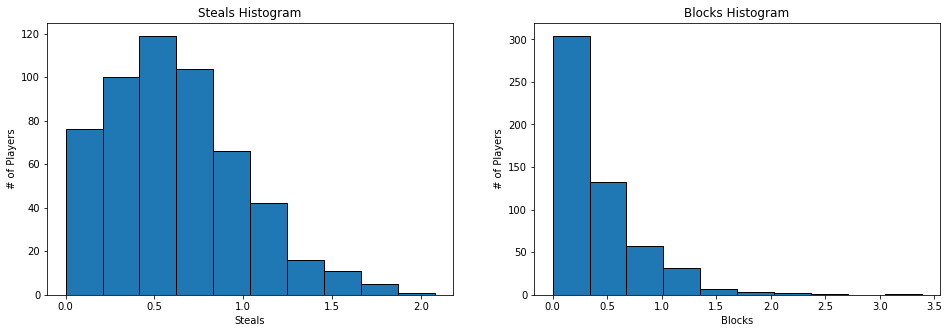

In [18]:
fig = plt.figure(figsize=(16,5))

ax1 = fig.add_subplot(121)
ax1.set_title("Steals Histogram")
ax1.xaxis.set_label_text("Steals")
ax1.yaxis.set_label_text("# of Players")

ax2 = fig.add_subplot(122)
ax2.xaxis.set_label_text("Blocks")
ax2.yaxis.set_label_text("# of Players")
ax2.set_title("Blocks Histogram")

ax1.hist(player_average_stats['STL'],edgecolor='black')
ax2.hist(player_average_stats['BLK'],edgecolor='black')

Given that we see a large amount of role players in the data which have low counting stats, let's see if the advanced stats might help us distinguish them further.

In [19]:
player_average_adv_stats = game_logs_data[season_filter].groupby(by=['PLAYER_NAME']).agg({'GAME_ID':'count', 'MIN': 'mean', 'PLUS_MINUS': 'mean','NBA_FANTASY_PTS': 'mean',\
                                                                                          'OFF_RATING': 'mean','DEF_RATING': 'mean','AST_PCT': 'mean',\
                                                                               'AST_TOV': 'mean','AST_RATIO': 'mean','OREB_PCT': 'mean','DREB_PCT': 'mean'\
                                                                                         ,'REB_PCT': 'mean','EFG_PCT': 'mean','TS_PCT': 'mean','USG_PCT': 'mean'\
                                                                                         ,'POSS': 'mean','PIE': 'mean','FGM': 'sum','FG3M': 'sum','FGA': 'sum'\
                                                                                          ,'FTA': 'sum','PTS': 'sum'})

player_average_adv_stats['SSN_EFG_PCT'] = (player_average_adv_stats['FGM']+(0.5*player_average_adv_stats['FG3M']))/player_average_adv_stats['FGA']
player_average_adv_stats['SSN_TS_PCT'] = player_average_adv_stats['PTS']/(2*(player_average_adv_stats['FGA']+(0.44*player_average_adv_stats['FTA'])))

player_average_adv_stats.describe(percentiles=[.125,.25,.375,.5,.625,.75,.875]).iloc[1:,:]

,GAME_ID,MIN,PLUS_MINUS,NBA_FANTASY_PTS,OFF_RATING,DEF_RATING,AST_PCT,AST_TOV,AST_RATIO,OREB_PCT,...,USG_PCT,POSS,PIE,FGM,FG3M,FGA,FTA,PTS,SSN_EFG_PCT,SSN_TS_PCT
mean,42.692593,19.819675,-0.394398,18.274067,104.691474,108.994587,0.132175,0.890295,15.580388,0.039570,...,0.178604,41.777546,0.079699,164.851852,50.790741,353.672222,87.287037,448.364815,0.514189,0.545190
std,20.706670,9.305805,3.154274,11.373674,11.547219,9.497480,0.088534,0.834739,8.056719,0.033904,...,0.055056,19.412344,0.063558,151.463584,55.493792,315.127123,99.411688,416.533484,0.106646,0.103224
min,1.000000,2.003333,-13.000000,-2.300000,37.500000,56.828571,0.000000,0.000000,0.000000,0.000000,...,0.017400,4.764706,-0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12.5%,13.000000,7.386926,-3.618304,5.658333,93.149242,101.854872,0.054085,0.112967,7.627020,0.011179,...,0.119135,16.350186,0.035093,13.000000,1.000000,30.000000,6.375000,35.000000,0.428571,0.469781
25%,26.750000,12.555102,-2.129487,9.340870,100.795000,106.039244,0.069537,0.256960,10.154288,0.015644,...,0.141435,26.480952,0.058664,39.000000,4.000000,93.000000,17.000000,104.500000,0.483326,0.513315
37.5%,37.125000,16.699927,-1.296870,13.298550,104.119350,108.602866,0.087760,0.415006,12.785367,0.021647,...,0.158034,35.277098,0.071903,84.125000,15.000000,182.125000,35.125000,228.125000,0.503943,0.539545
50%,46.000000,19.577332,-0.446360,16.806236,107.001716,110.250556,0.105839,0.635234,14.787279,0.027811,...,0.168915,41.404930,0.082984,128.000000,31.000000,273.000000,55.000000,343.500000,0.523810,0.554977
62.5%,54.000000,23.491247,0.342896,20.038290,109.349211,111.686649,0.135789,0.894456,16.821879,0.038314,...,0.188832,49.355682,0.094391,175.875000,53.875000,387.000000,81.875000,474.625000,0.545989,0.575304
75%,61.000000,27.666723,1.268928,24.506828,112.131842,112.895673,0.172267,1.292577,19.445305,0.052581,...,0.211179,58.197257,0.108514,253.250000,83.000000,559.250000,119.250000,687.250000,0.565961,0.598229
87.5%,67.000000,31.706098,2.779070,32.055826,114.649063,115.515321,0.244074,2.002260,24.394097,0.082800,...,0.242257,66.602174,0.130284,338.000000,120.625000,713.250000,178.625000,932.250000,0.599725,0.626302


Again there is a separation in many stats between the very top tier of players and the rest. OFF_RATING and DEF_RATING stand out as we see the top players are significantly more productive than the remaining. 

(array([  3.,   7.,  26., 157., 329.,  14.,   2.,   0.,   1.,   1.]),
 array([ 56.82857143,  69.71571429,  82.60285714,  95.49      ,
        108.37714286, 121.26428571, 134.15142857, 147.03857143,
        159.92571429, 172.81285714, 185.7       ]),
 <BarContainer object of 10 artists>)

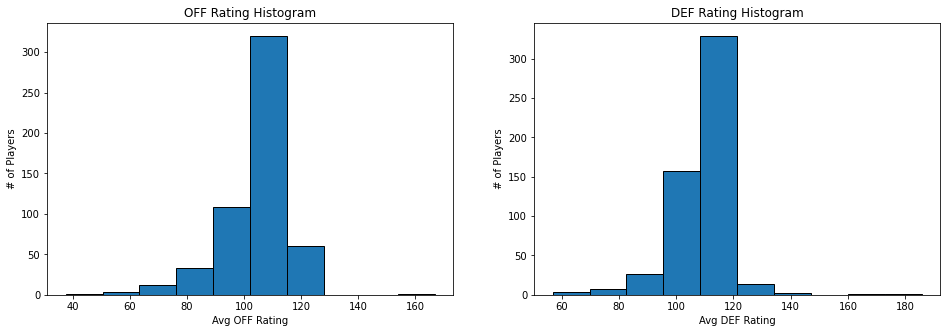

In [20]:
fig = plt.figure(figsize=(16,5))

ax1 = fig.add_subplot(121)
ax1.set_title("OFF Rating Histogram")
ax1.xaxis.set_label_text("Avg OFF Rating")
ax1.yaxis.set_label_text("# of Players")

ax2 = fig.add_subplot(122)
ax2.set_title("DEF Rating Histogram")
ax2.xaxis.set_label_text("Avg DEF Rating")
ax2.yaxis.set_label_text("# of Players")


ax1.hist(player_average_adv_stats['OFF_RATING'],edgecolor='black')
ax2.hist(player_average_adv_stats['DEF_RATING'],edgecolor='black')

#### Save a separate CSV copy of the final columns that we will use for clustering

In [85]:
player_average_all_stats_1 = game_logs_data.groupby(by=['SEASON_YEAR','PLAYER_NAME']).agg({'MIN': 'mean', 'REB': 'mean','AST': 'mean','STL': 'mean','BLK': 'mean','PTS': 'mean',\
                                                              'FGM': 'mean','FGA': 'mean','FTM': 'mean','FTA': 'mean','FG3M': 'mean','FG3A': 'mean','PLUS_MINUS': 'mean',\
                                                               'NBA_FANTASY_PTS': 'mean', 'OFF_RATING': 'mean','DEF_RATING': 'mean','AST_PCT': 'mean', \
                                                               'AST_TOV': 'mean','AST_RATIO': 'mean','OREB_PCT': 'mean','DREB_PCT': 'mean' ,'REB_PCT': 'mean',\
                                                               'USG_PCT': 'mean' ,'POSS': 'mean','PIE': 'mean'}).reset_index()

player_average_all_stats_2 = game_logs_data.groupby(by=['SEASON_YEAR','PLAYER_NAME']).agg({'PTS': 'sum','FGM': 'sum','FGA': 'sum','FTM': 'sum','FTA': 'sum','FG3M': 'sum','FG3A': 'sum'}).reset_index()
player_average_all_stats_2.columns = ['SEASON_YEAR_2','PLAYER_NAME_2','PTS_SUM','FGM_SUM','FGA_SUM','FTM_SUM','FTA_SUM','FG3M_SUM','FG3A_SUM']

player_average_all_stats = pd.concat([player_average_all_stats_1,player_average_all_stats_2],axis=1)

Iteration 2: After seeing results of clustering, I would like to use only PACE-indifferent stats to normalize against playing time. 

In [86]:
cols_to_normalize = ['REB', 'AST', 'STL', 'BLK', 'PTS', 'FGM', 'FGA', 'FTM', 'FTA','FG3M', 'FG3A']

for col in cols_to_normalize:
    player_average_all_stats[col+"_P100"] = (player_average_all_stats[col]/player_average_all_stats['POSS'])*100

In [87]:

player_average_all_stats['SSN_FG_PCT'] = player_average_all_stats['FGM_SUM']/player_average_all_stats['FGA_SUM']
player_average_all_stats['SSN_FT_PCT'] = player_average_all_stats['FTM_SUM']/player_average_all_stats['FTA_SUM']
player_average_all_stats['SSN_FG3_PCT'] = player_average_all_stats['FG3M_SUM']/player_average_all_stats['FG3A_SUM']

player_average_all_stats['SSN_EFG_PCT'] = (player_average_all_stats['FGM_SUM']+(0.5*player_average_all_stats['FG3M_SUM']))/player_average_all_stats['FGA_SUM']
player_average_all_stats['SSN_TS_PCT'] = player_average_all_stats['PTS_SUM']/(2*(player_average_all_stats['FGA_SUM']+(0.44*player_average_all_stats['FTA_SUM'])))

player_average_all_stats.drop(['SEASON_YEAR_2','PLAYER_NAME_2','FGM_SUM', 'FGA_SUM','FTM_SUM','FTA_SUM','FG3M_SUM','FG3A_SUM','PTS_SUM'], axis=1,inplace=True)
# Iteration 2: Removed columns for getting rid of non pace controlled stats
player_average_all_stats.drop(cols_to_normalize + ['MIN','PLUS_MINUS','NBA_FANTASY_PTS'], axis=1,inplace=True)
player_average_all_stats.dropna(inplace=True)
player_average_all_stats.head()

,SEASON_YEAR,PLAYER_NAME,OFF_RATING,DEF_RATING,AST_PCT,AST_TOV,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,...,FGA_P100,FTM_P100,FTA_P100,FG3M_P100,FG3A_P100,SSN_FG_PCT,SSN_FT_PCT,SSN_FG3_PCT,SSN_EFG_PCT,SSN_TS_PCT
0,2000-01,A.C. Green,90.895122,93.108537,0.040268,0.140610,7.292683,0.072439,0.151110,0.109402,...,12.180451,2.969925,4.172932,0.000000,0.225564,0.444444,0.711712,0.000000,0.444444,0.492168
1,2000-01,A.J. Guyton,84.721212,100.218182,0.196970,1.116061,20.524242,0.016273,0.038909,0.027667,...,16.368286,1.278772,1.534527,2.301790,5.882353,0.406250,0.833333,0.391304,0.476562,0.495198
2,2000-01,Aaron McKie,101.314474,95.788158,0.255368,1.990789,26.535526,0.014868,0.113355,0.065513,...,15.391248,3.211899,4.181936,1.142488,3.664583,0.473389,0.768041,0.311765,0.510504,0.549189
3,2000-01,Aaron Williams,95.898780,104.706098,0.065415,0.533293,8.285366,0.091220,0.176646,0.130598,...,14.361467,5.391074,6.849315,0.000000,0.044189,0.456923,0.787097,0.000000,0.456923,0.532808
4,2000-01,Adam Keefe,89.428358,104.811940,0.052791,0.417910,8.883582,0.090269,0.127299,0.110478,...,9.532374,2.338129,3.776978,0.059952,0.179856,0.402516,0.619048,0.333333,0.405660,0.449871


In [88]:
len(player_average_all_stats.columns)

29

In [89]:
player_average_all_stats.to_csv('all_seasons_avg_stats.csv')